# Computer Lab 2, Part I

This notebook consists of instructions, exercises and questions that form the practical part of Lab II, Part I. In this assignment, you will learn the basics of the OpenStack Python APIs that can be used to interact directly with the IaaS services Keystone (Identity), Glance (Image) and Nova (compute). Please prepare your solution and answers to questions directly in this notebook, and export it to PDF. Upload that PDF as to the student portal to complete Part I of the Lab.  

## Task - 1

In [1]:
from os import environ as env
import keystoneclient.v3.client as ksclient

To establish a client connection, we will need to pass a dictionary with information about the tenant, user, credentials and the API Identity endpoint. Here, I have sourced the "openrc.sh file" obtained from the Horizon dashboard in the underlying shell prior to starting the notebook. Hence, in order to actually run the code below, you would need to do the same with your own credentials. 

In [2]:
keystone = ksclient.Client(auth_url=env['OS_AUTH_URL'],
                           username=env['OS_USERNAME'],
                           password=env['OS_PASSWORD'],
                           project_name=env['OS_PROJECT_NAME'],
                           project_domain_name=env['OS_USER_DOMAIN_NAME'],
                           project_id=env['OS_PROJECT_ID'],
                           version=env['OS_IDENTITY_API_VERSION'],
                           user_domain_name=env['OS_USER_DOMAIN_NAME'],
                           region_name=env['OS_REGION_NAME'])

In [3]:
endpoints = keystone.service_catalog.get_endpoints()

In [4]:
for endpoint in endpoints:
    for edp in endpoints[endpoint]:
        if edp['interface'] == 'public':
            print ('service: ', endpoint, ', region: ', edp['region'], ', public endpoint: ', edp['url'])

service:  compute , region:  east-1 , public endpoint:  https://east-1.cloud.snic.se:8774/v2.1
service:  identity , region:  east-1 , public endpoint:  https://east-1.cloud.snic.se:5000
service:  cloudformation , region:  east-1 , public endpoint:  https://east-1.cloud.snic.se:8000/v1
service:  orchestration , region:  east-1 , public endpoint:  https://east-1.cloud.snic.se:8004/v1/fc1aade83c2e49baa7498b3918560d9f
service:  network , region:  east-1 , public endpoint:  https://east-1.cloud.snic.se:9696
service:  volumev3 , region:  east-1 , public endpoint:  https://east-1.cloud.snic.se:8776/v3/fc1aade83c2e49baa7498b3918560d9f
service:  image , region:  east-1 , public endpoint:  https://east-1.cloud.snic.se:9292
service:  metric , region:  east-1 , public endpoint:  https://130.238.28.5:8041
service:  placement , region:  east-1 , public endpoint:  https://east-1.cloud.snic.se:8780
service:  volumev2 , region:  east-1 , public endpoint:  https://east-1.cloud.snic.se:8776/v2/fc1aade83c

## Questions:

## Task - 2

In this task you need to write a small python program using Keystone and Nova APIs to list all the available VMs in the project. 

Use the following links and the code available in Task-1. 

https://docs.openstack.org/python-novaclient/pike/ https://docs.openstack.org/python-novaclient/pike/reference/api/index.html

Following are the functions required to accomplish the task: 

Load the required plugin:<br />
loader = loading.get_plugin_loader(...)

Create the auth object:<br />
auth = loader.load_from_options(....) 

Create session object using "auth":<br />
sess = session.Session( .... )

Create Nova Client Object:<br />
nova = client.Client( ... )

Print the Vms:<br />
nova.servers.list():

In [5]:
from keystoneauth1 import loading
from keystoneauth1 import session
from novaclient import client

loader = loading.get_plugin_loader('password')

auth = loader.load_from_options(auth_url=env['OS_AUTH_URL'],
                                username=env['OS_USERNAME'],
                                password=env['OS_PASSWORD'],
                                project_name=env['OS_PROJECT_NAME'],
                                project_domain_name=env['OS_USER_DOMAIN_NAME'],
                                project_id=env['OS_PROJECT_ID'],
                                user_domain_name=env['OS_USER_DOMAIN_NAME'])

sess = session.Session(auth=auth)

nova = client.Client('2.1', session=sess)

nova.servers.list()

[<Server: julie-vm2>,
 <Server: Ego_Csaasv2>,
 <Server: s1>,
 <Server: Sotiris_notebook>,
 <Server: akshai_stack-my_instance0-2uoqqwzhnjvw>,
 <Server: akshai_stack-my_instance1-tpdfa5zrtsmy>,
 <Server: wezh_lab2_scripted_instance>,
 <Server: vm1>,
 <Server: yudulab2>,
 <Server: akshai_cmd_C1>,
 <Server: Julie-Lab-2>,
 <Server: alex-lab2-test>,
 <Server: Henkeinst-WSL>,
 <Server: akshai_1>,
 <Server: a_hameed>,
 <Server: maha_script>,
 <Server: c-2>,
 <Server: shqi>,
 <Server: RaheelInit>,
 <Server: test_lab3>,
 <Server: Aneysha-LAb2>,
 <Server: Sotiris_notebook>,
 <Server: emgo2250_L2>,
 <Server: dapi_vm1>,
 <Server: test_cont_Ellinor_C2>,
 <Server: marcus_test>,
 <Server: c2_kevaja>,
 <Server: instance-kev>,
 <Server: Ego_C2>,
 <Server: Raheel_Docker>,
 <Server: marcus_stack_try2-my_instance1-d33sqsjju2ze>,
 <Server: marcus_stack_try2-my_instance0-52k527d6u34v>,
 <Server: com_w1>,
 <Server: com_m>,
 <Server: alex-lab2>,
 <Server: shreyas>,
 <Server: G5_W1>,
 <Server: G5_M>,
 <Server: 

## Task - 3:

Try to measure the speed with which you can put and get files to and from volumes. Conduct your experiment several times to gather statistic and plot a) A estimated distribution of the time taken (in wall clock) to write and read a file of size 10MB in your volume and b) vary the size of the file from 10kB to 100MB and plot the read and write throughput (in MB/s) times as a function of file size (for the smaller data sizes, you might need to repeat the experiment many times and obtain a statistical average). Use "Root" disk as a reference point. Include the resulting graphs and a description of your experiment in the report.

Time to write 10MB file = 0.00028980731964111327 seconds
Time to read 10MB file = 3.317832946777344e-05 seconds
Populating the interactive namespace from numpy and matplotlib


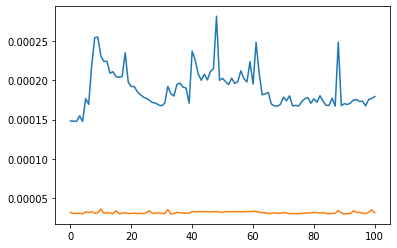

In [87]:
# Implement you solution here. Hint, the following command
import os
import time

iterations_time = 100

# Task a

filename = "/home/ubuntu/volume/10MB"
iterations_b = 100
        
ta = [None] * iterations_time

#write 10MB
for i in range(iterations_time):
    t0 = time.time()
    fw = open(filename,"wb")
    fw.seek(1024*1024*10-1)
    fw.write(b"\0")
    fw.close()
    ta[i] = time.time() - t0
print("Time to write 10MB file =" , sum(ta)/iterations_time, "seconds")

#read 10MB
for i in range(iterations_time):
    t0 = time.time()
    fr = open(filename,"r")
    fr.close()
    ta[i] = time.time() - t0
print("Time to read 10MB file =" , sum(ta)/iterations_time, "seconds")

# Task b

filename2 = "/home/ubuntu/volume/x_file"
iterations_b = 101
temp = [None] * iterations_time
t_read = [None] * iterations_b
t_write = [None] * iterations_b

for i in range(iterations_b):
    #write
    if (i == 0):
        for j in range(iterations_time):
            t0 = time.time()
            fw = open(filename2,"wb")
            fw.seek(1024*10)
            fw.write(b"\0")
            fw.close()
            temp[j] = time.time() - t0
        t_write[i] = sum(temp)/iterations_time
    else:
        for j in range(iterations_time):
            t0 = time.time()
            fw = open(filename2,"wb")
            fw.seek(1024*1024*i-1)
            fw.write(b"\0")
            fw.close()
            temp[j] = time.time() - t0
        t_write[i] = sum(temp)/iterations_time
#    print(i,"time to write",t_write[i])

    #read
    for j in range(iterations_time):
        t0 = time.time()
        fr = open(filename2,"r")
        fr.close()
        temp[j] = time.time() - t0
    t_read[i] = sum(temp)/iterations_time
#    print(i,"time to read",t_read[i])
        

# will  make matplotlib/pylab available and plots will be displayed directly in the notebook, for example
%pylab inline
plt.plot(t_write)
plt.plot(t_read)
#plt.plot([0,1,2,10])
#plt.plot([0,1,2,8])
#plt.plot([0,1,2,9])

Don't foget to terminate resources after your experiments. 

In [67]:
# Clean up volumes